In [1]:
import pickle
import pandas as pd
import numpy as np
#--------x-----#

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from collections import defaultdict

In [2]:
X_train = pickle.load(open('X_train.sav','rb'))
y_train = pickle.load(open('y_train.sav','rb'))
X_test = pickle.load(open('X_test.sav','rb'))
y_test = pickle.load(open('y_test.sav','rb'))
model = pickle.load(open('lgbm.sav','rb'))

In [3]:
import pickle
import pandas as pd
import numpy as np
import shap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

In [4]:
explainer = shap.TreeExplainer(model)

C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.iforest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.tre

In [5]:
explainer.expected_value

-2.1225109131044753

In [6]:
shap_values = explainer.shap_values(X_test)

C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\shap\explainers\tree.py:194: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


In [7]:
if isinstance(shap_values, list):
    shap_values = np.array(shap_values)


In [8]:
shap_values

array([[[-1.03953189, -0.2683741 ,  0.30732417, ...,  0.0273217 ,
         -0.13829598, -0.04311953],
        [-1.45017821,  0.37606592, -0.20010515, ...,  0.0429974 ,
          0.13418091, -0.04939666],
        [-0.85226393,  0.31301883, -0.20873483, ...,  0.06449565,
         -0.1152067 , -0.05265222],
        ...,
        [-1.46411019, -2.20298996, -0.0405738 , ...,  0.02288595,
         -0.18997411, -0.02173173],
        [ 1.42807111,  0.42340723,  0.3180628 , ...,  0.12267608,
          0.03223869, -0.03345293],
        [-0.9008069 ,  1.0494074 ,  0.36002622, ..., -0.19249475,
          0.00964409, -0.03988104]],

       [[ 1.03953189,  0.2683741 , -0.30732417, ..., -0.0273217 ,
          0.13829598,  0.04311953],
        [ 1.45017821, -0.37606592,  0.20010515, ..., -0.0429974 ,
         -0.13418091,  0.04939666],
        [ 0.85226393, -0.31301883,  0.20873483, ..., -0.06449565,
          0.1152067 ,  0.05265222],
        ...,
        [ 1.46411019,  2.20298996,  0.0405738 , ..., -

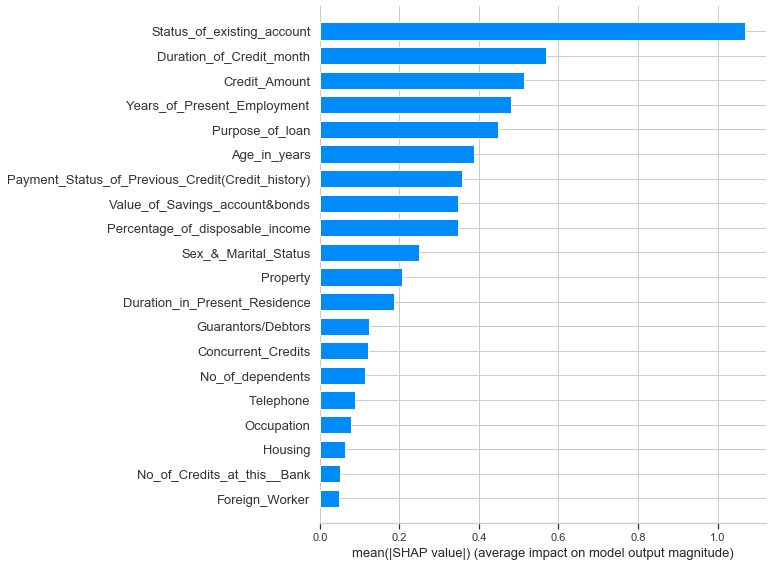

In [9]:
shap.summary_plot(shap_values[0], X_test,  plot_type = 'bar')

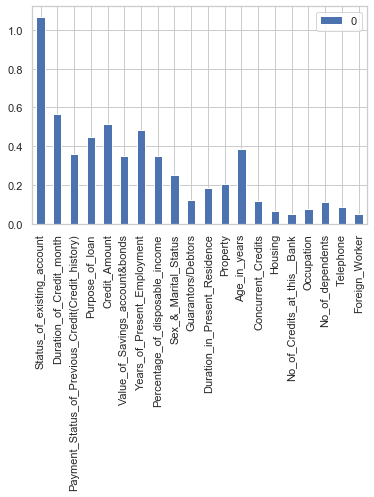

In [10]:
pd.DataFrame(np.abs(shap_values[1]).mean(0),X_test.columns).plot(kind = 'bar')

In [11]:
pd.DataFrame(np.abs(shap_values[0]).mean(0),X_test.columns)

,0
Status_of_existing_account,1.069399
Duration_of_Credit_month,0.567758
Payment_Status_of_Previous_Credit(Credit_history),0.357804
Purpose_of_loan,0.446711
Credit_Amount,0.512160
Value_of_Savings_account&bonds,0.348044
Years_of_Present_Employment,0.481759
Percentage_of_disposable_income,0.346990
Sex_&_Marital_Status,0.249871
Guarantors/Debtors,0.124204


In [12]:
np.abs(shap_values).mean(0)

array([[1.03953189, 0.2683741 , 0.30732417, ..., 0.0273217 , 0.13829598,
        0.04311953],
       [1.45017821, 0.37606592, 0.20010515, ..., 0.0429974 , 0.13418091,
        0.04939666],
       [0.85226393, 0.31301883, 0.20873483, ..., 0.06449565, 0.1152067 ,
        0.05265222],
       ...,
       [1.46411019, 2.20298996, 0.0405738 , ..., 0.02288595, 0.18997411,
        0.02173173],
       [1.42807111, 0.42340723, 0.3180628 , ..., 0.12267608, 0.03223869,
        0.03345293],
       [0.9008069 , 1.0494074 , 0.36002622, ..., 0.19249475, 0.00964409,
        0.03988104]])

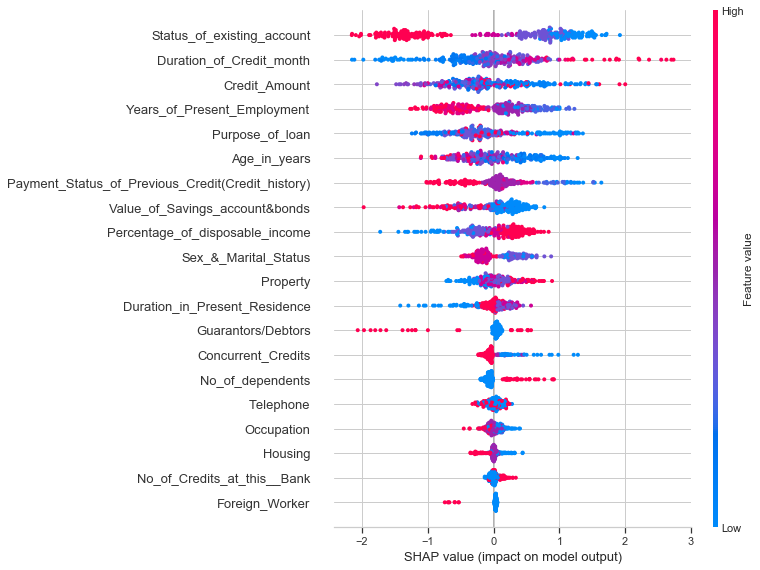

In [13]:
shap.summary_plot(shap_values[1], X_test,  plot_type = 'dot')

In [14]:
pd.DataFrame(shap_values[1],columns=X_test.columns.to_list())

,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,Guarantors/Debtors,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1.039532,0.268374,-0.307324,1.356305,-0.370957,0.423007,-0.195090,-0.834940,0.238276,0.015016,-0.109506,0.123720,0.163047,0.465935,0.236430,-0.045100,0.133794,-0.027322,0.138296,0.043120
1,1.450178,-0.376066,0.200105,0.029235,1.391372,0.051269,0.689700,0.466877,-0.154443,0.118005,0.291234,0.888135,0.290128,-0.046206,0.039334,0.049940,0.221150,-0.042997,-0.134181,0.049397
2,0.852264,-0.313019,0.208735,0.061429,1.323446,-0.438513,0.655249,-0.678133,0.485765,0.095624,-0.015401,-0.363217,0.351922,-0.046328,-0.117151,-0.003736,0.073330,-0.064496,0.115207,0.052652
3,-1.290184,-0.443082,-0.025454,0.007774,0.535180,-0.219918,-0.525148,0.106355,0.417230,0.044334,0.262863,0.046058,0.017776,-0.068827,0.014178,0.066108,-0.051709,-0.126302,-0.151327,0.029573
4,0.401034,0.305056,0.080379,-0.337508,0.724035,0.149194,0.174809,0.244643,0.576482,-1.970432,0.110446,-0.370013,0.161143,-0.042920,0.034325,-0.010711,0.070995,0.259347,0.171908,0.037808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.967119,-0.152235,-0.834234,0.314292,0.198752,0.342162,0.488648,-0.105415,-0.110542,0.044567,0.243383,-0.143589,-0.567007,-0.101507,-0.049784,-0.047844,0.087865,-0.058260,0.148938,0.017259
296,0.453277,-0.220735,0.196199,-0.076362,-1.000575,-0.758177,0.323048,-0.214732,-0.055098,0.046318,-0.269936,0.288124,-0.202627,-0.051645,0.028630,-0.029549,-0.112317,-0.012704,0.099303,0.023809
297,1.464110,2.202990,0.040574,-0.202649,-0.135203,0.317105,-0.348373,-0.764687,-0.083234,-1.187012,-0.624729,-0.076931,-0.227159,-0.095947,0.001663,0.001400,0.110620,-0.022886,0.189974,0.021732
298,-1.428071,-0.423407,-0.318063,-0.495670,-0.318217,0.115712,-0.638982,-0.170787,-0.259758,-0.003113,-0.127259,0.214778,0.003444,0.251703,-0.027976,-0.002109,-0.000702,-0.122676,-0.032239,0.033453


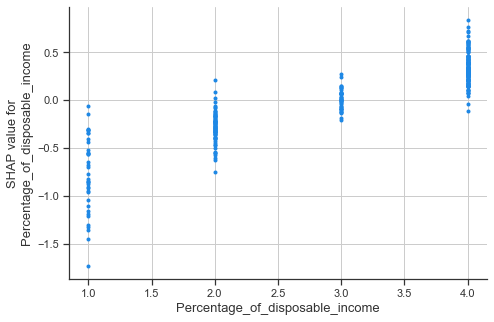

In [15]:
shap.dependence_plot('Percentage_of_disposable_income', shap_values[1],X_test,interaction_index=None)

In [16]:
shap_values[1].shape

(300, 20)

In [17]:
X_test.columns.get_loc("Percentage_of_disposable_income")
x = X_test["Percentage_of_disposable_income"]
y = pd.DataFrame(pd.DataFrame(shap_values[1]).iloc[:,7])

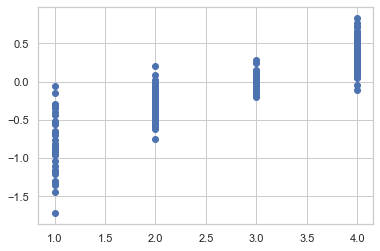

In [18]:
import matplotlib.pyplot
import pylab
matplotlib.pyplot.scatter(x,y)

matplotlib.pyplot.show()

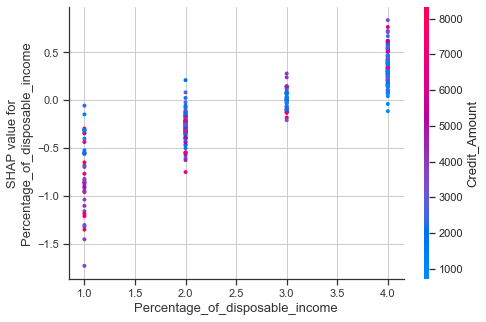

In [19]:
shap.dependence_plot('Percentage_of_disposable_income', shap_values[1],X_test,interaction_index='Credit_Amount')

In [20]:
x = X_test["Percentage_of_disposable_income"]
y = pd.DataFrame(pd.DataFrame(shap_values[1]).iloc[:,7])

In [21]:
t = X_test["Credit_Amount"]

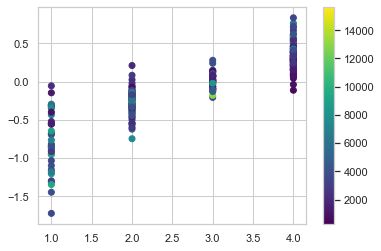

In [22]:
plt.scatter(x, y, c=t, cmap='viridis')
plt.colorbar()
plt.show()

In [23]:
X_test

,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,Guarantors/Debtors,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
993,1,18,4,0,3966,1,5,1,2,1,4,1,33,1,1,3,3,1,2,1
859,1,12,2,3,727,2,2,4,4,1,3,4,33,3,2,1,2,1,2,1
298,2,12,2,2,983,4,2,1,2,1,4,1,19,3,1,1,2,1,1,1
553,4,10,2,8,894,5,4,4,2,1,3,2,40,3,2,1,3,1,2,1
672,2,18,2,3,1113,1,3,4,2,3,4,1,26,3,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,4,24,4,9,4526,1,3,3,3,1,2,1,74,3,2,1,4,1,2,1
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,1,2,1
984,1,48,2,3,6999,1,4,1,4,3,1,1,34,3,2,2,3,1,2,1
491,4,12,4,2,3331,1,5,2,3,1,4,2,42,2,2,1,3,1,1,1


In [24]:
i = 984
d = X_test.loc[[i],:]
shap_values = explainer.shap_values(d)

C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\shap\explainers\tree.py:194: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


In [126]:
explainer.expected_value

[2.122510913104474, -2.122510913104474]

In [127]:
if isinstance(explainer.expected_value, list):
                expected_value = np.array(explainer.expected_value)
else:
            expected_value = np.array(explainer.expected_value)

In [128]:
        if isinstance(shap_values, list):
                 shap_values = np.array(shap_values)

In [129]:
expected_value[1]

-2.122510913104474

In [130]:
expected_value[1]

-2.122510913104474

In [131]:
np.sum(shap_values[1]) + expected_value[1]

-1.5411534683532018

In [137]:
shap.force_plot(expected_value[1],shap_values[1],feature_names=X_test.columns)

In [139]:
shap.force_plot(expected_value[1],shap_values[1],feature_names=X_test.columns,link='logit')

In [140]:
#Base Value
1/(1+np.exp(-expected_value[1])) + x1['Shapley Values'].sum()

2.3425553627062934

In [141]:
#Prediction
1/(1+np.exp(1.54))

0.1765352747791167

In [142]:
explainer.expected_value

[2.122510913104474, -2.122510913104474]

In [143]:
model.predict_proba(d)

array([[0.82363234, 0.17636766]])

In [151]:
x1 = pd.DataFrame(shap_values[1], columns=X_test.columns).T.sort_values(by= 0,ascending=True).reset_index()
x1.columns = ['Features','Shapley Values']
x1['flag'] = x1['Shapley Values'].apply(lambda x : ('Positive' if x >=0 else 'Negative'))
x1['Abs Shapley Values'] = x1['Shapley Values'].apply(lambda x : (x if x >=0 else x*-1))
x1['Contribution'] = x1['Abs Shapley Values']/x1['Abs Shapley Values'].sum()
print(x1['Contribution'].sum())
x1[x1.flag=='Positive'].sort_values(by= 'Contribution',ascending=False)

0.9999999999999999


,Features,Shapley Values,flag,Abs Shapley Values,Contribution
19,Duration_of_Credit_month,2.202990,Positive,2.202990,0.271338
18,Status_of_existing_account,1.464110,Positive,1.464110,0.180332
17,Value_of_Savings_account&bonds,0.317105,Positive,0.317105,0.039057
16,Telephone,0.189974,Positive,0.189974,0.023399
15,Occupation,0.110620,Positive,0.110620,0.013625
14,Payment_Status_of_Previous_Credit(Credit_history),0.040574,Positive,0.040574,0.004997
13,Foreign_Worker,0.021732,Positive,0.021732,0.002677
12,Housing,0.001663,Positive,0.001663,0.000205
11,No_of_Credits_at_this__Bank,0.001400,Positive,0.001400,0.000172


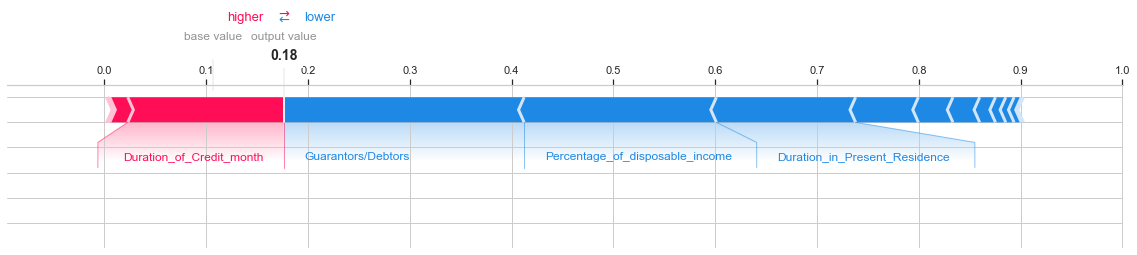

In [77]:
shap.force_plot(expected_value[1],shap_values[1],feature_names=X_test.columns,link='logit',matplotlib=True)

In [42]:
x1['flag'] = x1[0].apply(lambda x : ('Positive' if x >=0 else 'Negative'))
#x1['Abs Value'] = x1['flag'].apply(lambda x : (x*-1 if x == 'Negative' else x))

In [92]:
def inverse_logit(x):
    return 1/(1+np.exp(-x))

NameError: name 'inverse_logit' is not defined

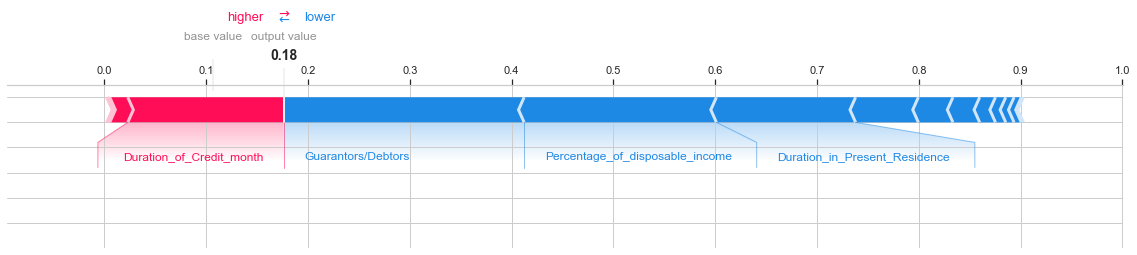

In [97]:
shap.force_plot(expected_value[1],shap_values[1],feature_names=X_test.columns,link='logit',matplotlib=True)

In [46]:
x1

,index,0,flag,Abs Value
0,Guarantors/Debtors,-1.187012,Negative,
1,Percentage_of_disposable_income,-0.764687,Negative,
2,Duration_in_Present_Residence,-0.624729,Negative,
3,Years_of_Present_Employment,-0.348373,Negative,
4,Age_in_years,-0.227159,Negative,
5,Purpose_of_loan,-0.202649,Negative,
6,Credit_Amount,-0.135203,Negative,
7,Concurrent_Credits,-0.095947,Negative,
8,Sex_&_Marital_Status,-0.083234,Negative,
9,Property,-0.076931,Negative,


array([[-1.46411019e+00, -2.20298996e+00, -4.05737982e-02,
         2.02648851e-01,  1.35202956e-01, -3.17104810e-01,
         3.48372821e-01,  7.64686754e-01,  8.32339379e-02,
         1.18701247e+00,  6.24729109e-01,  7.69314341e-02,
         2.27159219e-01,  9.59471963e-02, -1.66288093e-03,
        -1.40035704e-03, -1.10620302e-01,  2.28859464e-02,
        -1.89974113e-01, -2.17317284e-02]])

In [116]:
np.sum(shap_values[1]) + expected_value[1]

-1.5411534683532018

In [34]:
expected_value[1]

-2.122510913104474

In [21]:
def logit(x):
    return np.log(x/(1-x))

In [28]:
logit(0.9)

2.1972245773362196

In [29]:
def inverse_logit(x):
    return 1/(1+np.exp(-x))

In [35]:
inverse_logit(expected_value[1])

0.10692805546820248

In [36]:
inverse_logit(expected_value[0])

0.8930719445317976

In [37]:
x = pd.DataFrame(shap_values[1], columns=X_test.columns).T.sort_values(by= 0,ascending=True).reset_index()

In [38]:
x

,index,0
0,Percentage_of_disposable_income,-0.834940
1,Credit_Amount,-0.370957
2,Payment_Status_of_Previous_Credit(Credit_history),-0.307324
3,Years_of_Present_Employment,-0.195090
4,Duration_in_Present_Residence,-0.109506
5,No_of_Credits_at_this__Bank,-0.045100
6,No_of_dependents,-0.027322
7,Guarantors/Debtors,0.015016
8,Foreign_Worker,0.043120
9,Property,0.123720


(20,)

0    -0.834940
1    -0.370957
2    -0.307324
3    -0.195090
4    -0.109506
5    -0.045100
6    -0.027322
7     0.015016
8     0.043120
9     0.123720
10    0.133794
11    0.138296
12    0.163047
13    0.236430
14    0.238276
15    0.268374
16    0.423007
17    0.465935
18    1.039532
19    1.356305
Name: 0, dtype: float64

In [ ]:
Predition will be the output value

In [98]:
X_test

,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,Guarantors/Debtors,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
993,1,18,4,0,3966,1,5,1,2,1,4,1,33,1,1,3,3,1,2,1
859,1,12,2,3,727,2,2,4,4,1,3,4,33,3,2,1,2,1,2,1
298,2,12,2,2,983,4,2,1,2,1,4,1,19,3,1,1,2,1,1,1
553,4,10,2,8,894,5,4,4,2,1,3,2,40,3,2,1,3,1,2,1
672,2,18,2,3,1113,1,3,4,2,3,4,1,26,3,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,4,24,4,9,4526,1,3,3,3,1,2,1,74,3,2,1,4,1,2,1
998,2,12,2,3,6468,5,1,2,3,1,1,4,52,3,2,1,4,1,2,1
984,1,48,2,3,6999,1,4,1,4,3,1,1,34,3,2,2,3,1,2,1
491,4,12,4,2,3331,1,5,2,3,1,4,2,42,2,2,1,3,1,1,1


In [106]:
import shap.js

ModuleNotFoundError: No module named 'shap.js'

In [122]:
shap.initjs()
i = 298
d = X_test.loc[[i],:]
shap_values = explainer.shap_values(d)
shap.force_plot(expected_value[1],shap_values[1],feature_names=X_test.columns,link='logit')

In [123]:
shap.force_plot(expected_value[1],shap_values[1],feature_names=X_test.columns)

In [124]:
x1 = pd.DataFrame(shap_values[1], columns=X_test.columns).T.sort_values(by= 0,ascending=True).reset_index()
x1.columns = ['Features','Shapley Values']
x1['inv_logit'] = x1['Shapley Values'].apply(lambda x: inverse_logit(x))
x1['flag'] = x1['Shapley Values'].apply(lambda x : ('Positive' if x >=0 else 'Negative'))
x1['Abs Shapley Values'] = x1['Shapley Values'].apply(lambda x : (x if x >=0 else x*-1))
x1['Contribution'] = x1['Abs Shapley Values']/x1['Abs Shapley Values'].sum()
print(x1['Contribution'].sum())
x1#.sort_values(by= 0,ascending=False)

0.9999999999999998


,Features,Shapley Values,inv_logit,flag,Abs Shapley Values,Contribution
0,Percentage_of_disposable_income,-0.678133,0.336678,Negative,0.678133,0.107374
1,Value_of_Savings_account&bonds,-0.438513,0.392095,Negative,0.438513,0.069433
2,Property,-0.363217,0.410181,Negative,0.363217,0.057511
3,Duration_of_Credit_month,-0.313019,0.422378,Negative,0.313019,0.049563
4,Housing,-0.117151,0.470746,Negative,0.117151,0.018549
5,No_of_dependents,-0.064496,0.483882,Negative,0.064496,0.010212
6,Concurrent_Credits,-0.046328,0.488420,Negative,0.046328,0.007336
7,Duration_in_Present_Residence,-0.015401,0.496150,Negative,0.015401,0.002439
8,No_of_Credits_at_this__Bank,-0.003736,0.499066,Negative,0.003736,0.000592
9,Foreign_Worker,0.052652,0.513160,Positive,0.052652,0.008337
